In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
from torch.utils.data import DataLoader

import cv2
from skimage import io
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
import os
num_classes=2

batch_size=4

cuda


In [2]:
from torch.utils.data import Dataset
import pandas as pd

class JSRTdataset(Dataset):
  def __init__(self,csv_file,root_dir,transform=None):
    self.annotations=pd.read_csv(csv_file).drop("Unnamed: 0",axis=1)
    self.root_dir=root_dir
    self.transform=transform
  def __len__(self):
    return len(self.annotations)

  def __getitem__(self,index):
    img_path=os.path.join(self.root_dir,self.annotations.iloc[index,0])
    image=io.imread(img_path)
    image = cv2.equalizeHist(image)
    image = cv2.medianBlur(image,3)
    y_label=torch.tensor(self.annotations.iloc[index,1])
    if not torch.is_tensor(image):
        image=torchvision.transforms.functional.to_tensor(image)    
    if self.transform:
      image=self.transform(image)
    return (image,y_label)

In [3]:
train_set=JSRTdataset(csv_file="/content/drive/MyDrive/Colab Notebooks/train_new.csv",root_dir="/content/drive/MyDrive/Colab Notebooks/images")

test_set=JSRTdataset(csv_file="/content/drive/MyDrive/Colab Notebooks/test_new.csv",root_dir="/content/drive/MyDrive/Colab Notebooks/images")

train_loader=DataLoader(dataset=train_set,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(dataset=test_set,batch_size=batch_size,shuffle=True)

In [4]:
for i,data in enumerate(train_loader):
  imaged,labeld = data
  print(imaged.shape)
  print(labeld.shape)
  break
  #batch size = 4
  #channel number = 1
  #pixel dimension = (2048 * 2048) 

torch.Size([4, 1, 2048, 2048])
torch.Size([4])


In [5]:
labeld

tensor([1, 1, 0, 1])

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import numpy as np
new_image=np.empty([2048, 2048])

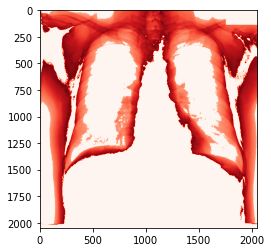

In [12]:
for i in range(2048):
  new_image[i]=np.array([x if (x >=0.2) and (x <=0.6) else 0 for x in imaged[2][0][i] ])
plt.imshow(new_image,cmap='Reds')

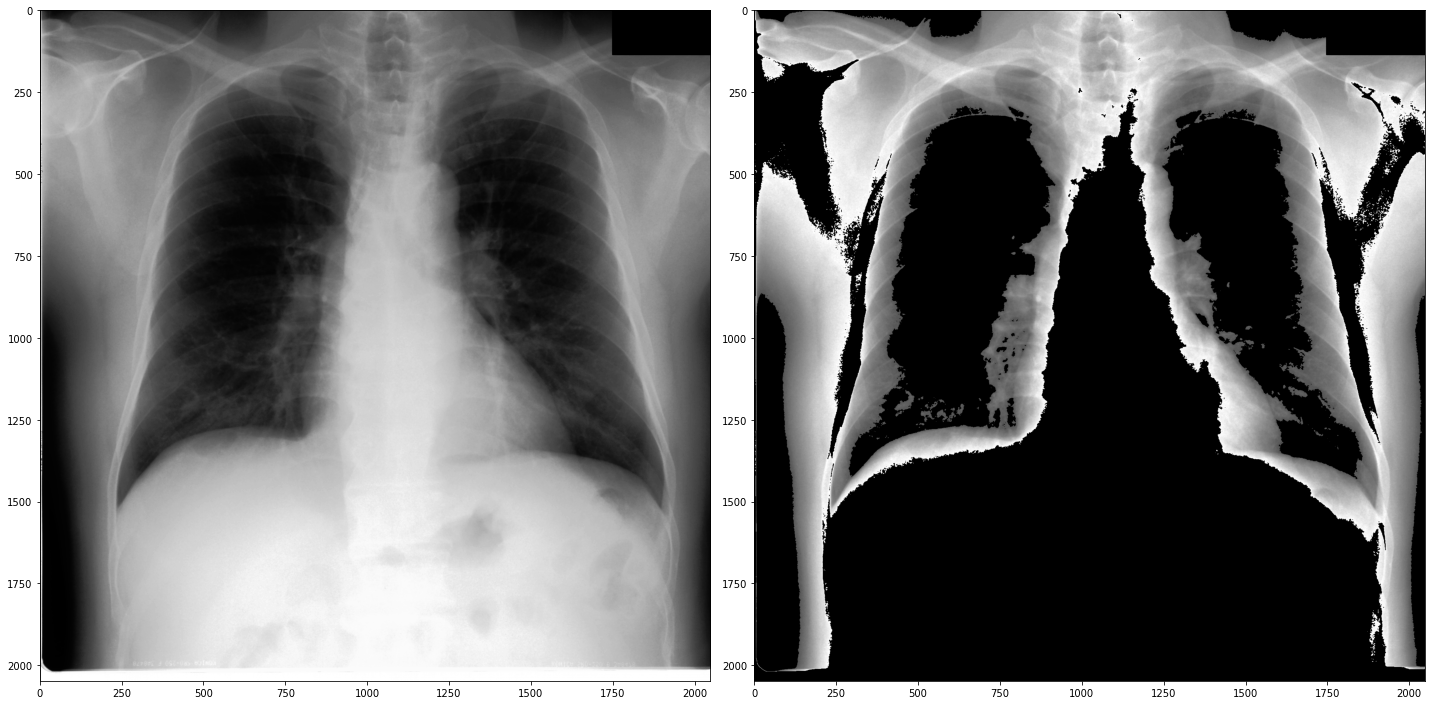

In [13]:
fig=plt.figure(figsize=(20,20))
fig.add_subplot(1,2,1)
plt.imshow(imaged[2][0],cmap='gray')
fig.add_subplot(1,2,2)
plt.imshow(new_image,cmap='gray')
plt.tight_layout()
plt.show()

In [14]:
 # Normalisation
num_pixels_train=len(train_set)*2048*2048
total_sum=0
for batch in train_loader: total_sum += batch[0].sum()
mean = total_sum/num_pixels_train
sum_of_squared_error = 0
for batch in train_loader: sum_of_squared_error += ((batch[0]-mean).pow(2)).sum()
std = torch.sqrt(sum_of_squared_error/num_pixels_train)
print(mean,std)

tensor(0.4952) tensor(0.2934)


In [15]:
mean=0.4952
std=0.2934

In [16]:
transformations = transforms.Compose([
    transforms.Resize(300),
    transforms.CenterCrop(244),
    transforms.Normalize(mean=mean, std=std)
])


In [17]:
train_set=JSRTdataset(csv_file="/content/drive/MyDrive/Colab Notebooks/train_new.csv",root_dir="/content/drive/MyDrive/Colab Notebooks/images",transform=transformations)

test_set=JSRTdataset(csv_file="/content/drive/MyDrive/Colab Notebooks/test_new.csv",root_dir="/content/drive/MyDrive/Colab Notebooks/images",transform=transformations)

train_loader=DataLoader(dataset=train_set,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(dataset=test_set,batch_size=batch_size,shuffle=True)

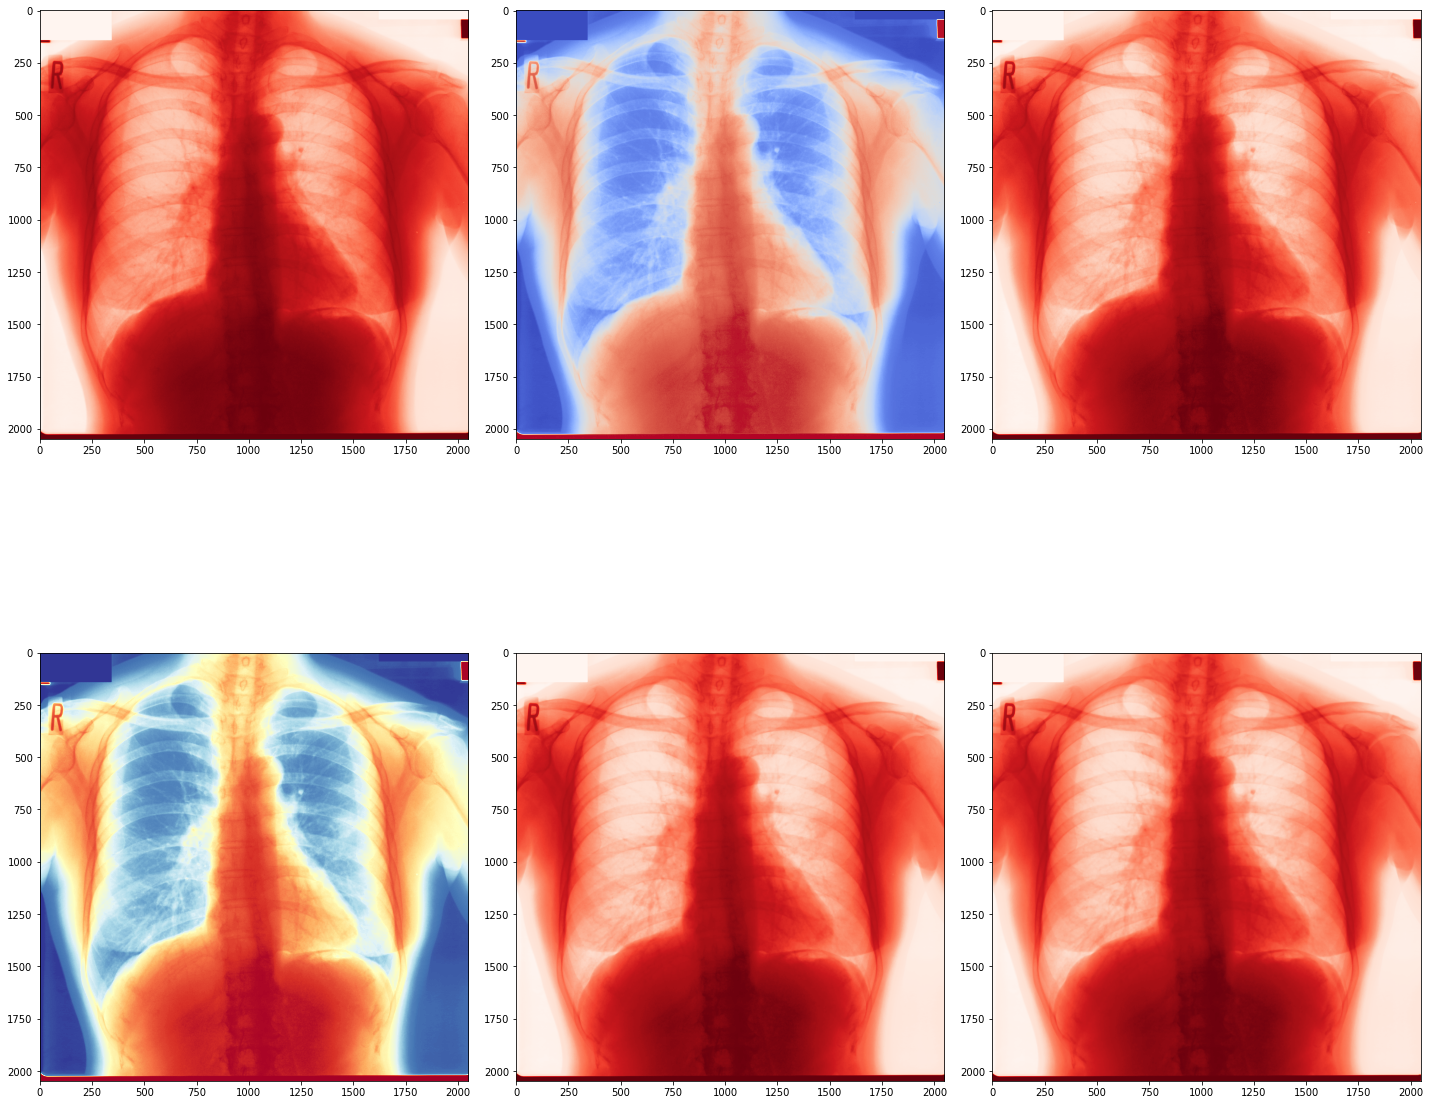

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.filters import median
from skimage.morphology import disk
image=io.imread('/content/drive/MyDrive/Colab Notebooks/images/JPCLN081.png')
image_equalised=cv2.equalizeHist(image)
image_double_equalised = cv2.equalizeHist(image_equalised)
image_median_blur_cv = cv2.medianBlur(image_equalised,3)
image_median_blur_skimage=median(image_equalised,disk(3),mode='constant',cval=0.0)
image_high_median_blur_skimage=median(image_equalised,disk(4),mode='constant',cval=0.0)
fig=plt.figure(figsize=(20,20))
fig.add_subplot(2,3,1)
plt.imshow(image,cmap='Reds')
fig.add_subplot(2,3,2)
plt.imshow(image_equalised,cmap='coolwarm')
fig.add_subplot(2,3,3)
plt.imshow(image_double_equalised,cmap='Reds')
fig.add_subplot(2,3,4)
plt.imshow(image_median_blur_cv,cmap='RdYlBu_r')
fig.add_subplot(2,3,5)
plt.imshow(image_median_blur_skimage,cmap='Reds')
fig.add_subplot(2,3,6)
plt.imshow(image_high_median_blur_skimage,cmap='Reds')
plt.tight_layout()
plt.show()


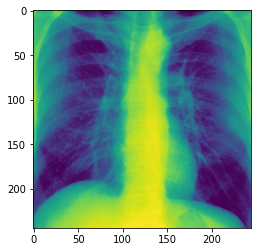

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
for images , labels in train_set:
  plt.imshow(images[0])
  plt.show()
  break

In [20]:
for images , labels in train_set:
  print(images.shape)
  print(images.dtype)
  break

torch.Size([1, 244, 244])
torch.float32


In [21]:
dataiter=iter(train_loader)
images,labels=dataiter.next()

print(images.shape)
print(images[0].shape)
print(labels.shape)
print(labels[0].item())

torch.Size([4, 1, 244, 244])
torch.Size([1, 244, 244])
torch.Size([4])
1


In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [24]:
!python -c "import monai" || pip install -q "monai[pillow, tqdm]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'monai'
     |████████████████████████████████| 358kB 16.8MB/s 
     |████████████████████████████████| 81kB 12.4MB/s 


In [25]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
import PIL
import torch
import numpy as np
from sklearn.metrics import classification_report

from monai.apps import download_and_extract
from monai.config import print_config
from monai.metrics import compute_roc_auc
from monai.networks.nets import densenet121

In [26]:
device = torch.device("cuda:0")
model = densenet121(spatial_dims=2, in_channels=1,
                    out_channels=num_classes).to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 1e-5)
val_interval = 1

In [69]:
max_epochs = 100

In [70]:
best_metric = -1
best_metric_epoch = -1
epoch_loss_values = []
metric_values = []
root_dir='/content/drive/MyDrive/Xen.ai'
for epoch in range(max_epochs):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{max_epochs}")
    model.train()
    epoch_loss = 0
    step = 0
    for batch_data in train_loader:
        step += 1
        inputs, labels = batch_data[0].to(device), batch_data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        print(
            f"{step}/{len(train_set) // train_loader.batch_size}, "
            f"train_loss: {loss.item():.4f}")
        epoch_len = len(train_set) // train_loader.batch_size
    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            y_pred = torch.tensor([], dtype=torch.float32, device=device)
            y = torch.tensor([], dtype=torch.long, device=device)
            for val_data in test_loader:
                val_images, val_labels = (
                    val_data[0].to(device),
                    val_data[1].to(device),
                )
                y_pred = torch.cat([y_pred, model(val_images)], dim=0)
                y = torch.cat([y, val_labels], dim=0)
            auc_metric = compute_roc_auc(
                y_pred, y, to_onehot_y=True, softmax=True)
            metric_values.append(auc_metric)
            acc_value = torch.eq(y_pred.argmax(dim=1), y)
            acc_metric = acc_value.sum().item() / len(acc_value)
            if auc_metric > best_metric:
                best_metric = auc_metric
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(), os.path.join(
                    root_dir, "best_metric_model.pth"))
                print("saved new best metric model")
            print(
                f"current epoch: {epoch + 1} current AUC: {auc_metric:.4f}"
                f" current accuracy: {acc_metric:.4f}"
                f" best AUC: {best_metric:.4f}"
                f" at epoch: {best_metric_epoch}"
            )

print(
    f"train completed, best_metric: {best_metric:.4f} "
    f"at epoch: {best_metric_epoch}")

Streaming output truncated to the last 5000 lines.
27/49, train_loss: 0.2237
28/49, train_loss: 0.0998
29/49, train_loss: 0.0788
30/49, train_loss: 0.0892
31/49, train_loss: 0.4633
32/49, train_loss: 0.5548
33/49, train_loss: 0.4378
34/49, train_loss: 0.0830
35/49, train_loss: 0.0832
36/49, train_loss: 1.0975
37/49, train_loss: 0.0534
38/49, train_loss: 0.0390
39/49, train_loss: 0.5581
40/49, train_loss: 0.0554
41/49, train_loss: 0.4939
42/49, train_loss: 0.4179
43/49, train_loss: 0.0852
44/49, train_loss: 0.0600
45/49, train_loss: 0.1131
46/49, train_loss: 0.0908
47/49, train_loss: 0.0713
48/49, train_loss: 1.1517
49/49, train_loss: 0.3042
50/49, train_loss: 0.3969
epoch 8 average loss: 0.2059
current epoch: 8 current AUC: 0.6967 current accuracy: 0.7000 best AUC: 0.7133 at epoch: 4
----------
epoch 9/100
1/49, train_loss: 0.1225
2/49, train_loss: 0.0609
3/49, train_loss: 0.1807
4/49, train_loss: 0.0596
5/49, train_loss: 0.0488
6/49, train_loss: 0.1475
7/49, train_loss: 0.2154
8/49, t

## Plot the loss and metric

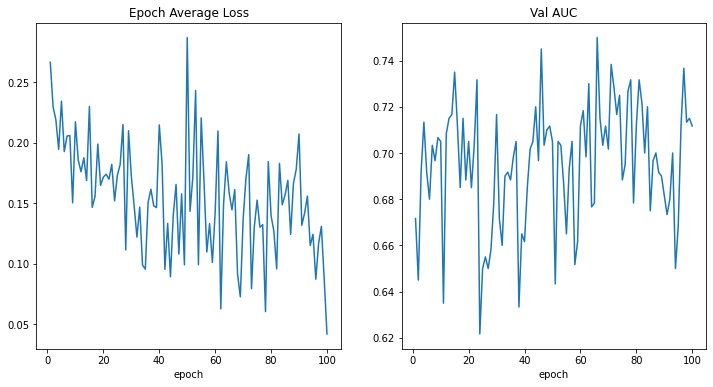

In [71]:
plt.figure("train", (12, 6))
plt.subplot(1, 2, 1)
plt.title("Epoch Average Loss")
x = [i + 1 for i in range(len(epoch_loss_values))]
y = epoch_loss_values
plt.xlabel("epoch")
plt.plot(x, y)
plt.subplot(1, 2, 2)
plt.title("Val AUC")
x = [val_interval * (i + 1) for i in range(len(metric_values))]
y = metric_values
plt.xlabel("epoch")
plt.plot(x, y)
plt.show()

In [86]:
model.load_state_dict(torch.load(
    os.path.join(root_dir, "best_metric_model.pth")))
model.eval()
y_true = []
y_pred = []
pred_probabilities=[]
with torch.no_grad():
    for test_data in test_loader:
        test_images, test_labels = (
            test_data[0].to(device),
            test_data[1].to(device),
        )
        pred = model(test_images).argmax(dim=1)
        pred_proba=nn.Softmax()(model(test_images)).T[1]
        for i in range(len(pred)):
            y_true.append(test_labels[i].item())
            y_pred.append(pred[i].item())
            pred_probabilities.append(pred_proba[i].item())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [87]:
print(classification_report(
    y_true, y_pred, target_names=["Not malignant","malignant"], digits=4))

               precision    recall  f1-score   support

Not malignant     0.7429    0.8667    0.8000        30
    malignant     0.7333    0.5500    0.6286        20

     accuracy                         0.7400        50
    macro avg     0.7381    0.7083    0.7143        50
 weighted avg     0.7390    0.7400    0.7314        50



In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

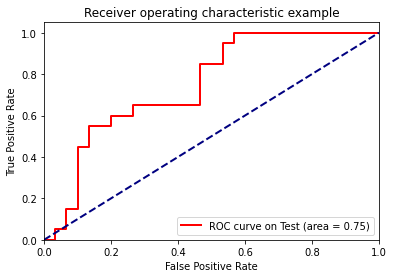

In [89]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_true, pred_probabilities, pos_label=1)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure()
lw = 2
plt.plot(fpr_test, tpr_test, color='red',
         lw=lw, label='ROC curve on Test (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")



plt.show()

In [90]:
thresholds_test

array([1.97606570e+00, 9.76065695e-01, 9.67848361e-01, 9.55961466e-01,
       8.57684195e-01, 7.99068213e-01, 6.64109647e-01, 5.98114550e-01,
       5.09503007e-01, 4.77206171e-01, 4.74351734e-01, 3.90290976e-01,
       3.27200890e-01, 1.70957506e-01, 1.50174022e-01, 1.08369246e-01,
       5.25015332e-02, 4.22253199e-02, 4.21219207e-02, 2.80418408e-05])